Micro-Credit Defaulter Model
Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.

##### Feature Description

1. label :Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
2. msisdn :mobile number of user
3. aon :age on cellular network in days
4. daily_decr30 :Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
5. daily_decr90 :Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
6. rental30 :Average main account balance over last 30 days
7. rental90 :Average main account balance over last 90 days
8. last_rech_date_ma :Number of days till last recharge of main account
9. last_rech_date_da : Number of days till last recharge of data account
10. last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
11. cnt_ma_rech30 : Number of times main account got recharged in last 30 days
12. fr_ma_rech30 : Frequency of main account recharged in last 30 days
13. sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
14. medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
15. medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
16. cnt_ma_rech90 : Number of times main account got recharged in last 90 days
17. fr_ma_rech90 : Frequency of main account recharged in last 90 days
18. sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indian Rupee)
19. medianamnt_ma_rech90 :Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
20. medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
21. cnt_da_rech30 : Number of times data account got recharged in last 30 days
22. fr_da_rech30 : Frequency of data account recharged in last 30 days
23. cnt_da_rech90 : Number of times data account got recharged in last 90 days
24. fr_da_rech90 : Frequency of data account recharged in last 90 days
25. cnt_loans30 : Number of loans taken by user in last 30 days
26. amnt_loans30 : Total amount of loans taken by user in last 30 days
27. maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
28. medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
29. cnt_loans90: Number of loans taken by user in last 90 days
30. amnt_loans90 :Total amount of loans taken by user in last 90 days
31. maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
32. medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
33. payback30 :Average payback time in days over last 30 days
34. payback90: Average payback time in days over last 90 days
35. pcircle: telecom circle
36. pdate :date

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

In [2]:
#Reading data 
df=pd.read_csv('Data file.csv',index_col='Unnamed: 0')
pd.set_option('display.max_columns',None)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

-> all are int or float types except
three object type attributes are ==msisdn,pcircle,pdate

In [4]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

there is no missing data in the dataset

In [5]:
df.shape

(209593, 36)

(209593, 36) is the shape of the dataset

In [6]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
df[df['aon']<0].head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
31,1,70130I90843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.80,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,UPW,2016-06-07
198,1,46858I90841,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,0.0,1539.0,1539.0,4.87,1,0,1539,1539.0,4.87,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-13
323,1,03027I70379,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,16.0,943.0,471.5,12.30,2,16,943,471.5,12.30,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-12
505,1,75670I84458,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,0.0,770.0,770.0,8.40,1,0,770,770.0,8.40,0.0,0.0,0,0,1,6,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,UPW,2016-06-13
604,1,58495I89235,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,0.0,1539.0,1539.0,80.20,1,0,1539,1539.0,80.20,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-14


In [8]:
df[df['aon']<0].tail(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
208717,1,10162I90589,-34.0,19.260000,19.260000,714.15,714.15,1.0,0.0,773,1,0.0,773.0,773.0,4.5,1,0,773,773.0,4.5,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-15
209122,1,65511I84450,-18.0,700.580000,700.600000,1057.72,1090.76,1.0,0.0,770,1,0.0,770.0,770.0,25.0,1,0,770,770.0,25.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-07-01
209241,1,34896I70375,-28.0,10.640000,10.640000,133.35,133.35,1.0,0.0,770,1,0.0,770.0,770.0,54.0,1,0,770,770.0,54.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-21
209422,1,51717I84459,-44.0,7.166667,7.166667,368.55,368.55,1.0,0.0,773,1,0.0,773.0,773.0,29.0,1,0,773,773.0,29.0,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-05
209515,0,50508I70786,-2.0,1030.000000,1030.000000,634.91,634.91,1.0,0.0,1539,1,0.0,1539.0,1539.0,17.7,1,0,1539,1539.0,17.7,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.0,0.0,UPW,2016-07-17


In [9]:
df.describe().transpose()['min']<0

label                   False
aon                      True
daily_decr30             True
daily_decr90             True
rental30                 True
rental90                 True
last_rech_date_ma        True
last_rech_date_da        True
last_rech_amt_ma        False
cnt_ma_rech30           False
fr_ma_rech30            False
sumamnt_ma_rech30       False
medianamnt_ma_rech30    False
medianmarechprebal30     True
cnt_ma_rech90           False
fr_ma_rech90            False
sumamnt_ma_rech90       False
medianamnt_ma_rech90    False
medianmarechprebal90     True
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30             False
amnt_loans30            False
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
Name: min,

aon: age on cellular network cannot be a negative number , so assuming that the it is a data entry mistake and modifying it to positive value
Similarly for  'daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma','last_rech_date_da', 'medianmarechprebal30','medianmarechprebal90'

In [10]:
negCols=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma','last_rech_date_da', 'medianmarechprebal30','medianmarechprebal90']

In [11]:
df1=df.copy()

In [12]:
for col in negCols:
    df[col]=df[col].apply(np.abs)

In [13]:
df.describe().transpose()['min']<0

label                   False
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma        False
cnt_ma_rech30           False
fr_ma_rech30            False
sumamnt_ma_rech30       False
medianamnt_ma_rech30    False
medianmarechprebal30    False
cnt_ma_rech90           False
fr_ma_rech90            False
sumamnt_ma_rech90       False
medianamnt_ma_rech90    False
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30             False
amnt_loans30            False
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
Name: min,

In [14]:
df[df1['aon']<0].head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
31,1,70130I90843,42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.80,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,UPW,2016-06-07
198,1,46858I90841,36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,0.0,1539.0,1539.0,4.87,1,0,1539,1539.0,4.87,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-13
323,1,03027I70379,37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,16.0,943.0,471.5,12.30,2,16,943,471.5,12.30,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-12
505,1,75670I84458,36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,0.0,770.0,770.0,8.40,1,0,770,770.0,8.40,0.0,0.0,0,0,1,6,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,UPW,2016-06-13
604,1,58495I89235,35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,0.0,1539.0,1539.0,80.20,1,0,1539,1539.0,80.20,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,UPW,2016-06-14


In df there are no negative values anymore

### 1. Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [15]:
df.nunique()

label                        2
msisdn                  186243
aon                       4499
daily_decr30            146597
daily_decr90            158245
rental30                129745
rental90                138712
last_rech_date_ma         1157
last_rech_date_da         1163
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     29634
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     28957
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [16]:
unique = df.nunique()
unique = unique[unique.values == 1]
unique

pcircle    1
dtype: int64

In [17]:
df.drop('pcircle',axis =1, inplace=True)

In [18]:
df.shape

(209593, 35)

Now we have (209593, 35) 35 columns

In [19]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [20]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [21]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pdate,209593,82,2016-07-04,3150


## Observation

* Summary statistics shows all the statistics of our dataset i.e. mean, median and other calculation.
* Mean is greater than median in all the columns so our data is right skewed.
* The difference between 75% and maximum is higher that's why outliers are there, which needs to be removed.
* The pdate column tells the date when the data is collect. It contains only three month data.
* msidn is a mobile number of user and mobile number is unique for every customers. And it doesnt help in predicting whether a customer will pay back the loan so dropping it.

In [22]:
df1=df.copy()

In [23]:
df.drop('msisdn',axis=1,inplace=True)

In [24]:
df.shape

(209593, 34)

## Data Exploration

In [25]:

#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('*'*12)

pdate : ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12'
 '2016-07-22' '2016-06-04' '2016-07-24' '2016-06-18' '2016-08-13'
 '2016-06-17' '2016-08-07' '2016-07-12' '2016-08-06' '2016-07-19'
 '2016-08-21' '2016-08-04' '2016-07-25' '2016-07-30' '2016-08-17'
 '

In [26]:

#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype=='float64' or df[column].dtype=='int64':
        print(str(column) + ' : ' + str(df[column].nunique()))
        print('*'*12)

label : 2
************
aon : 4499
************
daily_decr30 : 146597
************
daily_decr90 : 158245
************
rental30 : 129745
************
rental90 : 138712
************
last_rech_date_ma : 1157
************
last_rech_date_da : 1163
************
last_rech_amt_ma : 70
************
cnt_ma_rech30 : 71
************
fr_ma_rech30 : 1083
************
sumamnt_ma_rech30 : 15141
************
medianamnt_ma_rech30 : 510
************
medianmarechprebal30 : 29634
************
cnt_ma_rech90 : 110
************
fr_ma_rech90 : 89
************
sumamnt_ma_rech90 : 31771
************
medianamnt_ma_rech90 : 608
************
medianmarechprebal90 : 28957
************
cnt_da_rech30 : 1066
************
fr_da_rech30 : 1072
************
cnt_da_rech90 : 27
************
fr_da_rech90 : 46
************
cnt_loans30 : 40
************
amnt_loans30 : 48
************
maxamnt_loans30 : 1050
************
medianamnt_loans30 : 6
************
cnt_loans90 : 1110
************
amnt_loans90 : 69
************
maxamnt_loans

In [27]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

label :Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
There are 26162 defaulters

In [28]:
df['label'].value_counts(normalize=True) *100

1    87.517713
0    12.482287
Name: label, dtype: float64

* After seeing the target feature - label column for this dataset it is clearly shown that 86.11% of data is label 1 and only 13.8% of data is label 0 so our dataset is imbalanced.

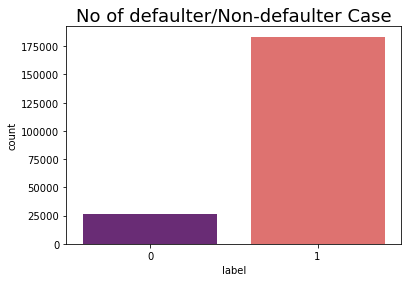

1    183431
0     26162
Name: label, dtype: int64


In [29]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

* Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not beenpayed i.e. defaulter.

In [30]:
#Checking the unique value in pdate column.
df['pdate'].nunique()

82

In [31]:
#Making the new column Day, Month and year from pdate column
df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [32]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [32]:
#Checking the number of months 
df['pMonth'].unique()

array([7, 8, 6], dtype=int64)

In [33]:
#After fetching the data from pdate column now we are going to drop it because it has not any significant role.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [34]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print(' Total Number of Feature::', df.shape[1])
print(' Number of categorical features::', len(cat_df))
print(' Number of Numerical Feature::', len(num_df))

 Total Number of Feature:: 36
 Number of categorical features:: 0
 Number of Numerical Feature:: 36


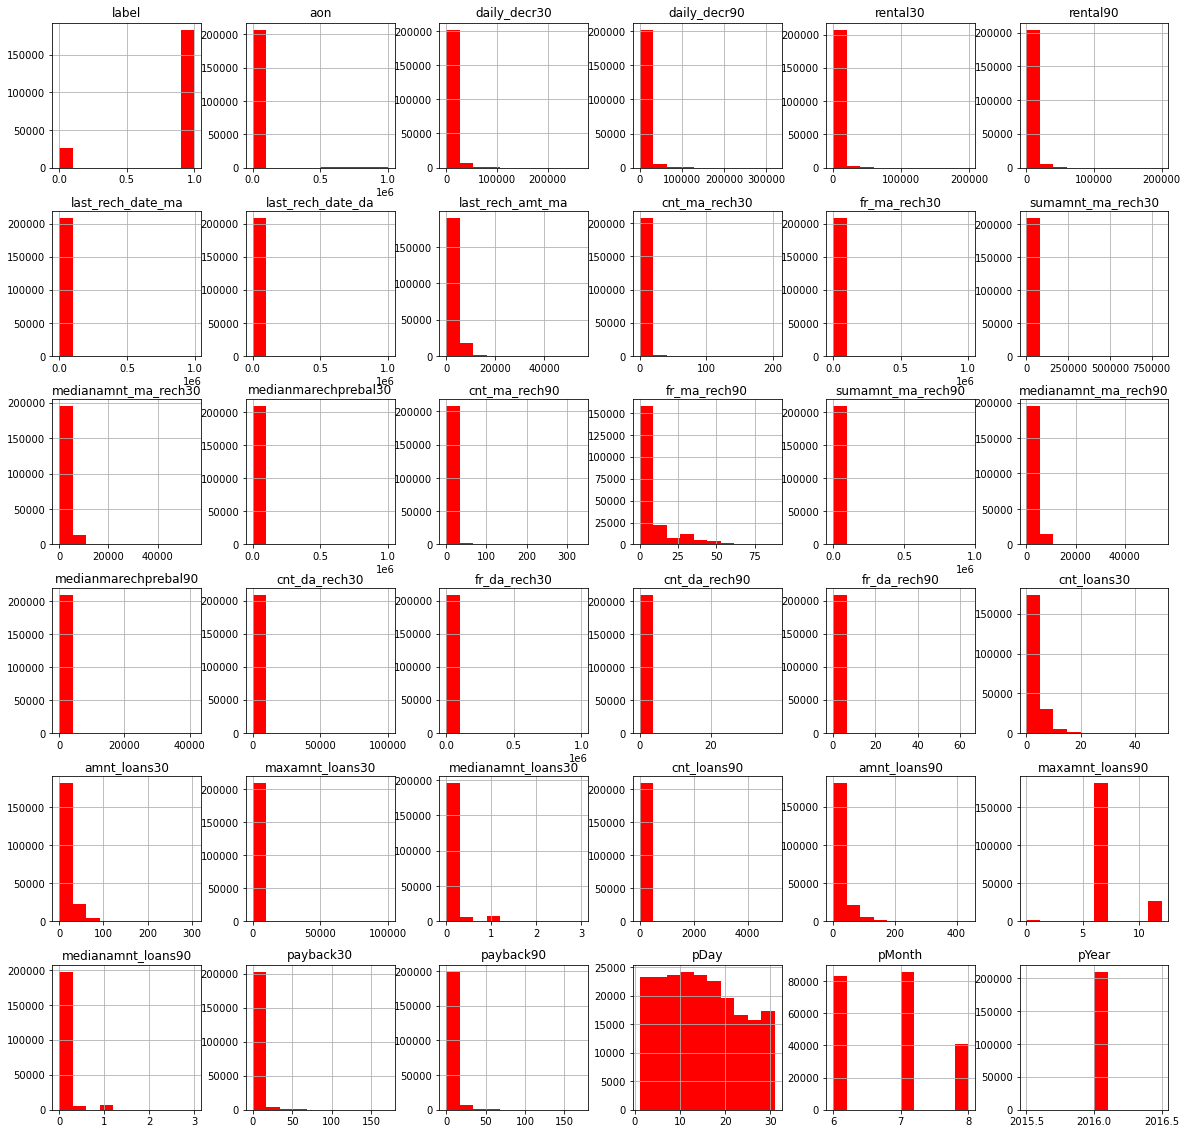

In [35]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

<b>Observation:</b>
* We plot the histogram to display the shape and spread of continuous sample data.In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range

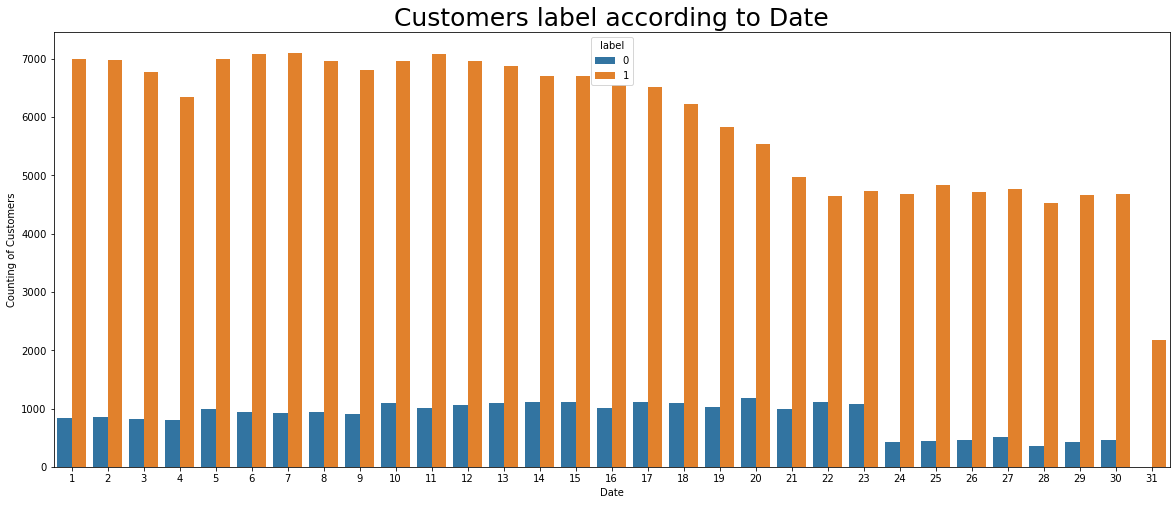

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=df)
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

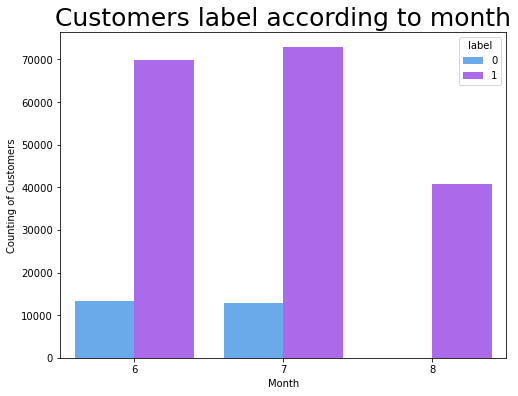

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

* There are severals customers at June and July month who did not pay their loan. 

In [38]:
#check cor-relation
df_cor = df.corr()
df_cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth,pYear
label,1.000000,-0.003788,0.168293,0.166146,0.058645,0.076033,0.003730,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004843,0.236392,0.084385,0.205793,0.120855,0.037126,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949,NaN
aon,-0.003788,1.000000,0.001101,0.000371,-0.000796,-0.000693,0.001692,-0.001693,0.004253,-0.003152,-0.001163,0.000703,0.004303,0.003930,-0.002729,0.004400,0.001007,0.004906,-0.000982,0.001564,0.000892,0.001121,0.005395,-0.001830,-0.001730,-0.002764,0.004665,-0.000611,-0.002323,-0.001193,0.002772,0.001938,0.002201,0.000659,-0.001869,NaN
daily_decr30,0.168293,0.001101,1.000000,0.977704,0.441532,0.459200,0.000484,-0.001636,0.275836,0.451383,-0.000577,0.636535,0.295355,-0.001160,0.587337,-0.078301,0.762981,0.257846,0.036432,0.000700,-0.001499,0.038814,0.020672,0.366114,0.471490,-0.000028,-0.011611,0.008962,0.563495,0.400199,-0.037305,0.026914,0.047174,0.006480,0.518661,NaN
daily_decr90,0.166146,0.000371,0.977704,1.000000,0.434106,0.471894,0.000905,-0.001886,0.264130,0.426706,-0.000343,0.603885,0.282959,-0.000753,0.593068,-0.079531,0.768816,0.250518,0.035318,0.000661,-0.001570,0.031155,0.016437,0.340385,0.447867,0.000025,-0.005592,0.009446,0.567203,0.397251,-0.034686,0.019399,0.040799,-0.021505,0.539408,NaN
rental30,0.058645,-0.000796,0.441532,0.434106,1.000000,0.955014,-0.001177,0.003169,0.134436,0.235484,-0.001207,0.285599,0.138196,-0.001367,0.312944,-0.033150,0.350876,0.118533,0.028351,-0.000954,-0.002359,0.072559,0.047158,0.181107,0.234186,-0.000751,-0.016536,0.004084,0.298886,0.234106,-0.035429,0.072888,0.094828,0.038310,0.362763,NaN
rental90,0.076033,-0.000693,0.459200,0.471894,0.955014,1.000000,-0.001781,0.002690,0.127888,0.231900,-0.000525,0.270504,0.127414,-0.001211,0.346136,-0.036160,0.368419,0.110478,0.030613,-0.000167,-0.002222,0.056549,0.037249,0.172183,0.232432,-0.001352,-0.009516,0.005183,0.327480,0.251250,-0.034113,0.067003,0.099257,0.010126,0.427715,NaN
last_rech_date_ma,0.003730,0.001692,0.000484,0.000905,-0.001177,-0.001781,1.000000,0.001790,-0.000146,0.004308,-0.001629,0.002103,-0.001357,0.004071,0.004260,0.001419,0.002241,-0.000725,-0.001089,-0.003468,-0.003626,-0.003538,-0.002395,0.001190,0.000900,0.000929,0.001835,-0.000226,0.000867,-0.001124,0.002771,-0.002235,-0.001585,0.000557,-0.001213,NaN
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003169,0.002690,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002847,0.001272,0.000798,-0.000414,0.000219,0.003930,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800,NaN
last_rech_amt_ma,0.131804,0.004253,0.275836,0.264130,0.134436,0.127888,-0.000146,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002344,0.016707,0.106267,0.418735,0.818734,0.124681,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919,NaN
cnt_ma_rech30,0.237331,-0.003152,0.451383,0.426706,0.235484,0.231900,0.004308,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000079,0.886433,-0.152759,0.584060,-0.051347,0.012728,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148,NaN


<AxesSubplot:>

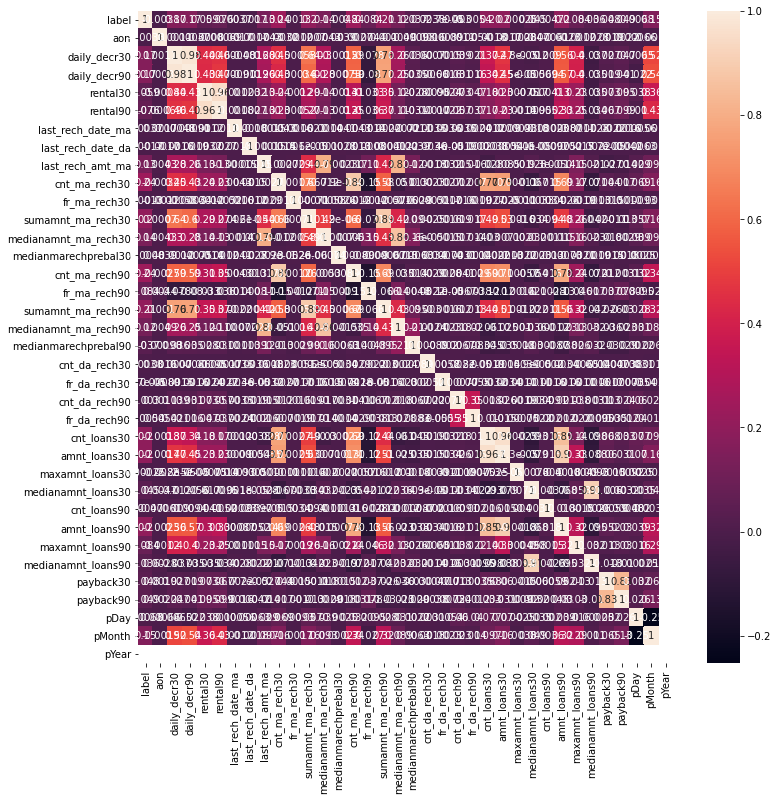

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)


* daily_decr30 and daily_decr90 features are highly correlated with each otheer.
* rental30 and rental90 features are highly correlated with each other.
* cnt_loans30 and amount_loans30 columns are highly correlated with each other.
* amount_loans30 is also highly correlated with amount_loans90 column.
* medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.
* We have to drop one of the features which are highly correlated with other features to avoid multicolinearity problem.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                 feature         VIF
0                  label    1.124554
1                    aon    1.000207
2           daily_decr30   29.590239
3           daily_decr90   32.299993
4               rental30   13.264101
5               rental90   14.131717
6      last_rech_date_ma    1.000158
7      last_rech_date_da    1.000133
8       last_rech_amt_ma    3.435309
9          cnt_ma_rech30   15.086525
10          fr_ma_rech30    1.000144
11     sumamnt_ma_rech30   12.765773
12  medianamnt_ma_rech30    5.091708
13  medianmarechprebal30    1.000167
14         cnt_ma_rech90   16.462239
15          fr_ma_rech90    1.081310
16     sumamnt_ma_rech90   15.198877
17  medianamnt_ma_rech90    5.635240
18  medianmarechprebal90    1.066199
19         cnt_da_rech30    1.000211
20          fr_da_rech30    1.000176
21         cnt_da_rech90    1.149512
22          fr_da_rech90    1.140590
23           cnt_loans30   23.344951
24          amnt_loans30   29.437081
25       maxamnt_loans30    1.000181
2

VIF should be between 1 to 5
so looking at others and droppping one by one
dropping pYear as it has only one uniqie value however
dropping daily_decr30, amnt_loans30,

In [43]:
df.drop(['pYear','daily_decr30','amnt_loans30'],axis=1,inplace=True)

In [44]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                 feature        VIF
0                  label   8.943975
1                    aon   1.011555
2           daily_decr90   4.416257
3               rental30  17.321591
4               rental90  17.978732
5      last_rech_date_ma   1.004968
6      last_rech_date_da   1.004926
7       last_rech_amt_ma   6.039216
8          cnt_ma_rech30  27.683068
9           fr_ma_rech30   1.004940
10     sumamnt_ma_rech30  18.863849
11  medianamnt_ma_rech30   8.958322
12  medianmarechprebal30   1.005199
13         cnt_ma_rech90  27.966490
14          fr_ma_rech90   1.485022
15     sumamnt_ma_rech90  22.329424
16  medianamnt_ma_rech90  10.145008
17  medianmarechprebal90   1.135619
18         cnt_da_rech30   1.004142
19          fr_da_rech30   1.004953
20         cnt_da_rech90   1.161430
21          fr_da_rech90   1.143010
22           cnt_loans30  16.663112
23       maxamnt_loans30   1.004314
24    medianamnt_loans30   6.378856
25           cnt_loans90   1.007177
26          amnt_loans90  16

dropping these now cnt_ma_rech30, pMonth ,cnt_loans30   

In [45]:
df.drop(['cnt_ma_rech30', 'pMonth' ,'cnt_loans30'],axis=1,inplace=True)

In [46]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                 feature        VIF
0                  label   6.679109
1                    aon   1.011009
2           daily_decr90   4.162357
3               rental30  17.024941
4               rental90  17.532901
5      last_rech_date_ma   1.004825
6      last_rech_date_da   1.004820
7       last_rech_amt_ma   5.996777
8           fr_ma_rech30   1.004745
9      sumamnt_ma_rech30   9.503366
10  medianamnt_ma_rech30   8.525598
11  medianmarechprebal30   1.004828
12         cnt_ma_rech90   7.262833
13          fr_ma_rech90   1.474471
14     sumamnt_ma_rech90  15.697206
15  medianamnt_ma_rech90   9.813641
16  medianmarechprebal90   1.134980
17         cnt_da_rech30   1.003982
18          fr_da_rech30   1.004724
19         cnt_da_rech90   1.161156
20          fr_da_rech90   1.142992
21       maxamnt_loans30   1.004164
22    medianamnt_loans30   6.356077
23           cnt_loans90   1.006953
24          amnt_loans90   5.139479
25       maxamnt_loans90   7.616354
26    medianamnt_loans90   6

drop these now rental30,sumamnt_ma_rech30

In [47]:
df.drop(['rental30', 'sumamnt_ma_rech30'],axis=1,inplace=True)

In [48]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]  
vif_data.sort_values(by='feature')

,feature,VIF
22,amnt_loans90,5.129040
1,aon,1.011009
15,cnt_da_rech30,1.003974
17,cnt_da_rech90,1.158175
21,cnt_loans90,1.006949
10,cnt_ma_rech90,7.245568
2,daily_decr90,3.891979
16,fr_da_rech30,1.004723
18,fr_da_rech90,1.142691
7,fr_ma_rech30,1.004737


drop these now maxamnt_loans30 , medianamnt_loans30, medianamnt_ma_rech30, 

In [49]:
df.drop(['maxamnt_loans30' , 'medianamnt_loans30', 'medianamnt_ma_rech30'],axis=1,inplace=True)

In [50]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
vif_data.sort_values(by='feature')

,feature,VIF
19,amnt_loans90,5.127017
1,aon,1.010982
14,cnt_da_rech30,1.003959
16,cnt_da_rech90,1.158139
18,cnt_loans90,1.006900
9,cnt_ma_rech90,7.192196
2,daily_decr90,3.888563
15,fr_da_rech30,1.004721
17,fr_da_rech90,1.142590
7,fr_ma_rech30,1.004732


<AxesSubplot:>

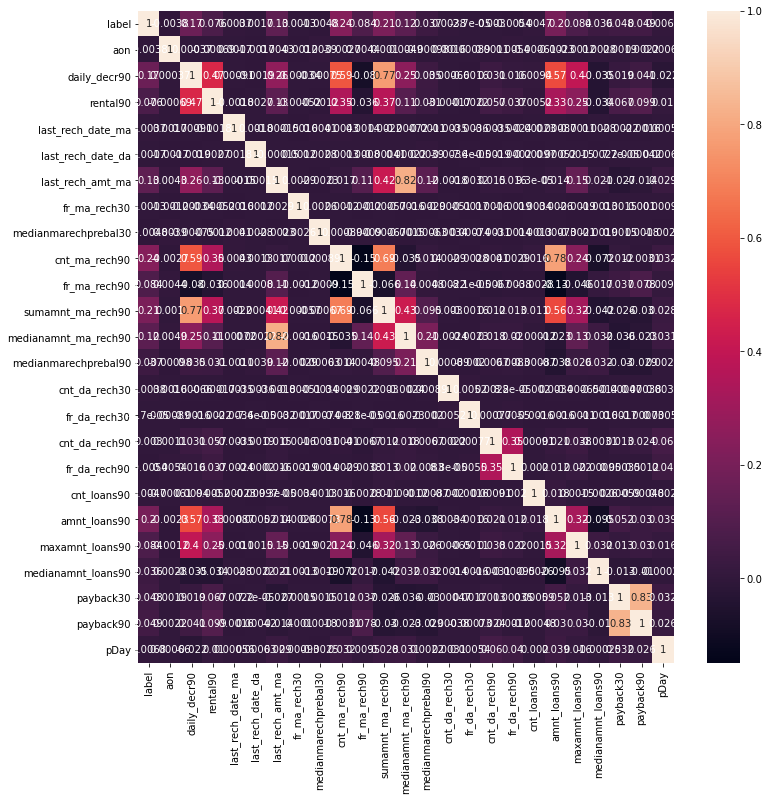

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

sumamnt_ma_rech90 and cnt_ma_rech90 are corelated so dropping - cnt_ma_rech90

In [52]:
df.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)

In [53]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
vif_data.sort_values(by='feature')

,feature,VIF
18,amnt_loans90,5.107816
1,aon,1.010980
13,cnt_da_rech30,1.003943
15,cnt_da_rech90,1.157946
17,cnt_loans90,1.006900
9,cnt_ma_rech90,5.322330
2,daily_decr90,2.714536
14,fr_da_rech30,1.004720
16,fr_da_rech90,1.142580
7,fr_ma_rech30,1.004726


<AxesSubplot:>

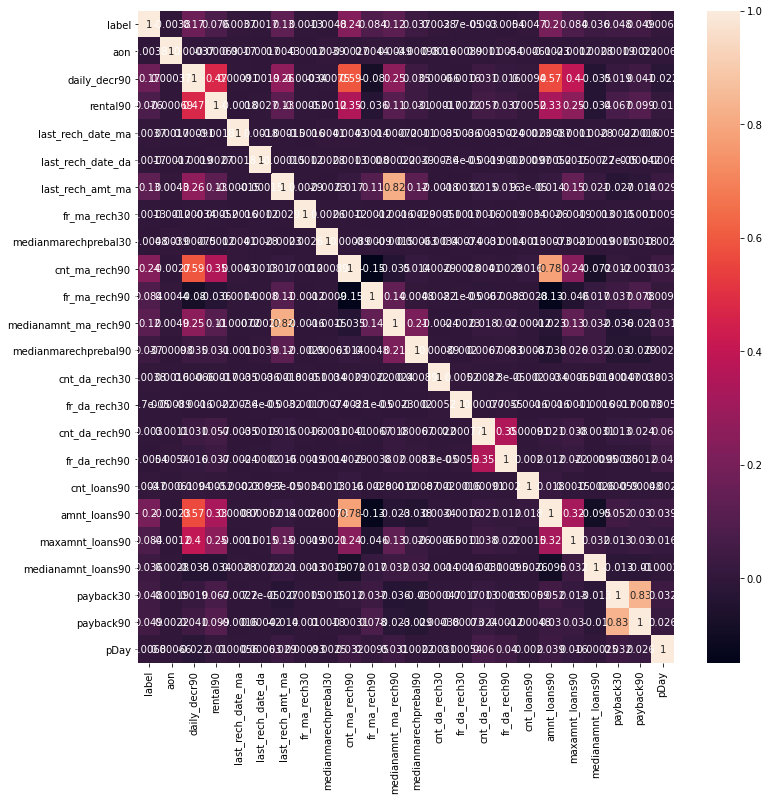

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [55]:
#Now checking the shape
print(df.shape)

(209593, 24)


<AxesSubplot:>

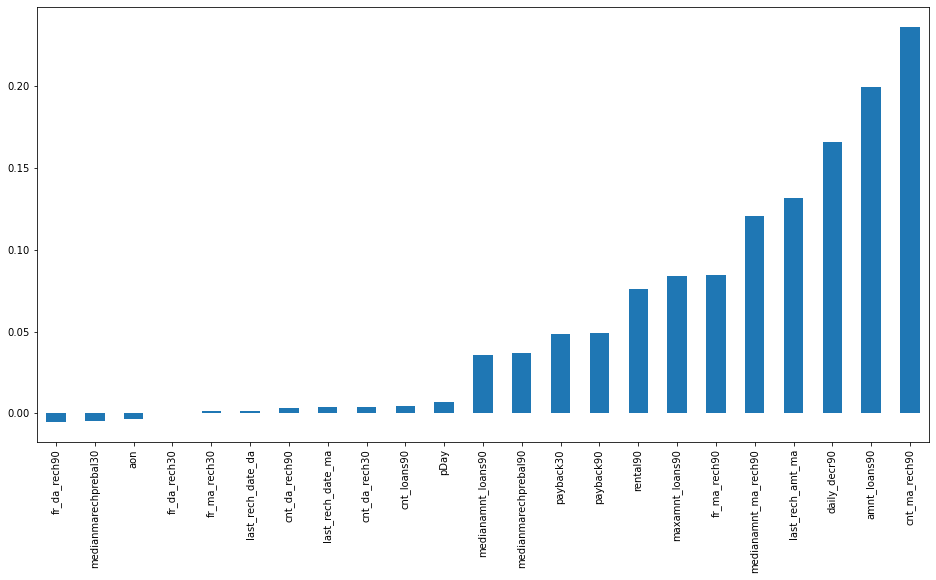

In [56]:
plt.figure(figsize=(16,8))
df.corr()['label'][1:].sort_values().plot(kind='bar')

## checking for outliers

In [57]:
df.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'fr_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pDay'],
      dtype='object')

In [58]:
from scipy.stats import zscore
zScores=np.abs(zscore(df.drop('label',axis=1)))

In [59]:
filteredEntries=(zScores<3).all(axis=1)

In [60]:
np.sum(filteredEntries)

167841

In [61]:
((209593-167841)/209593)*100

19.92051261253954

if we remove outliers we loose 19.9~ 20% data so not removing outliers

### checking skewness

In [62]:
from scipy.stats import zscore
from scipy import stats

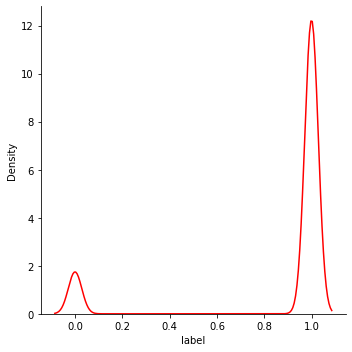

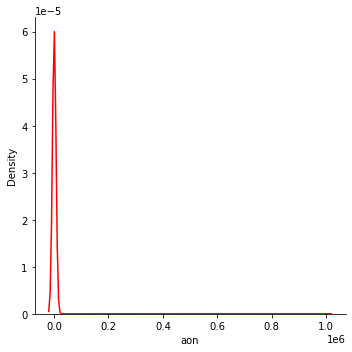

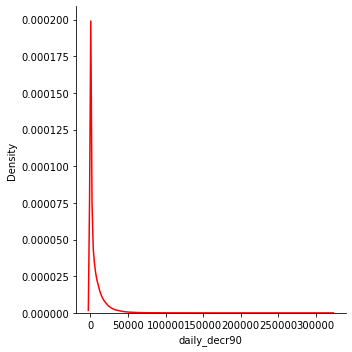

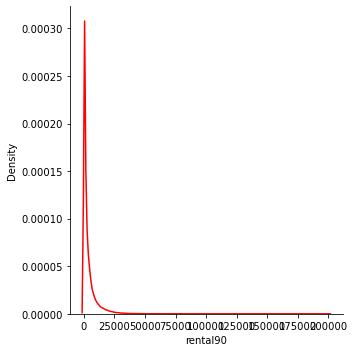

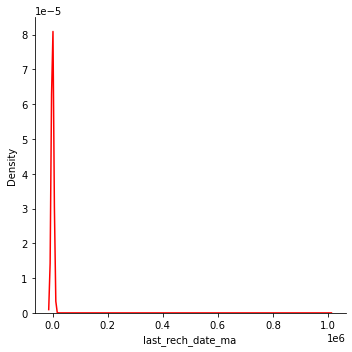

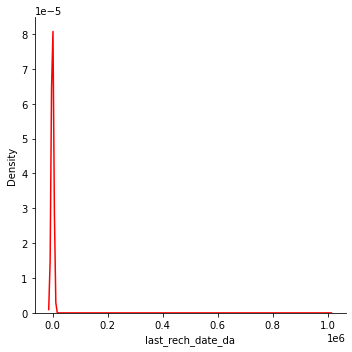

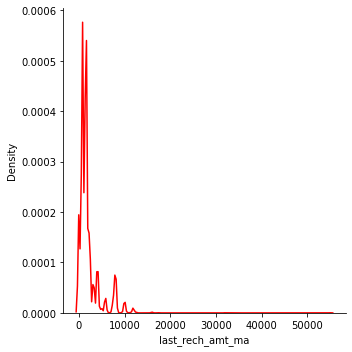

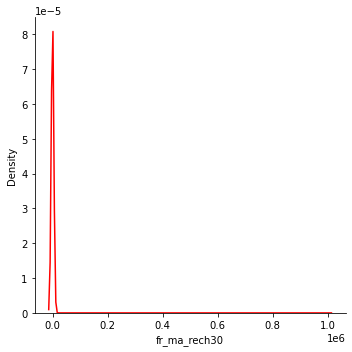

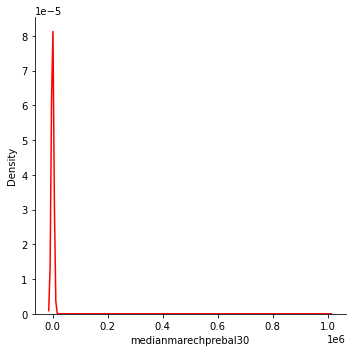

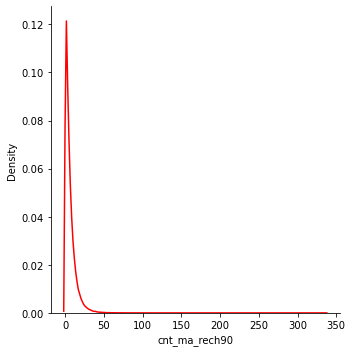

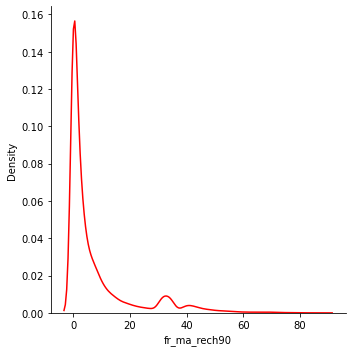

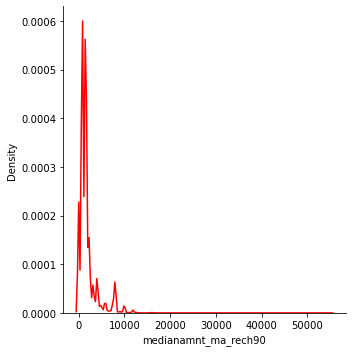

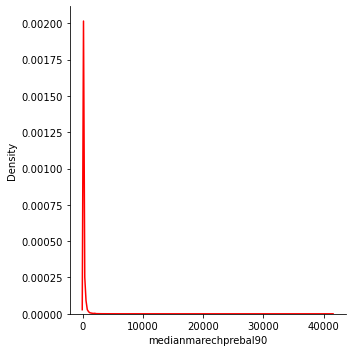

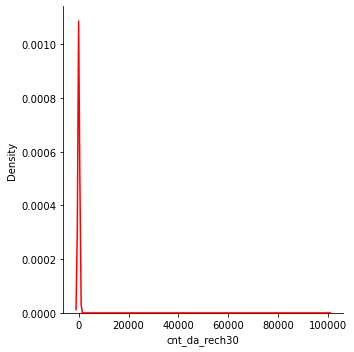

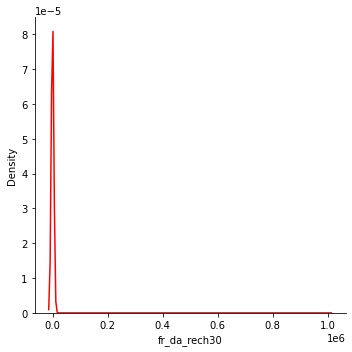

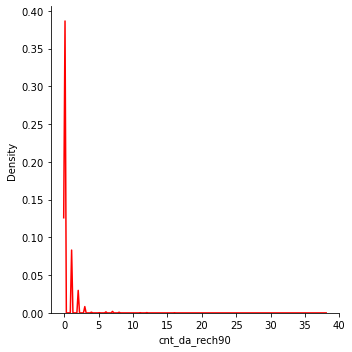

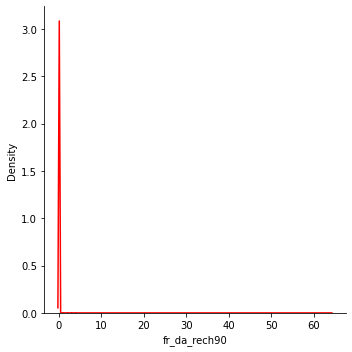

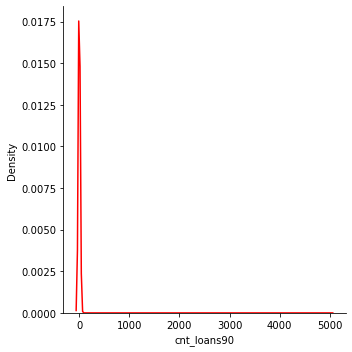

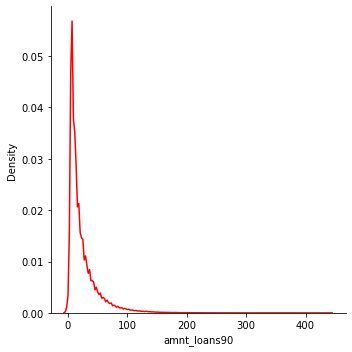

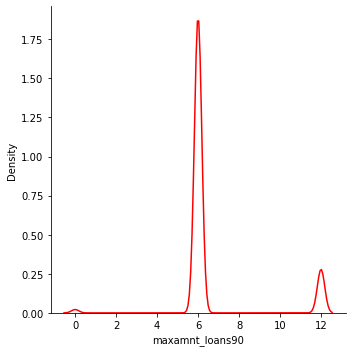

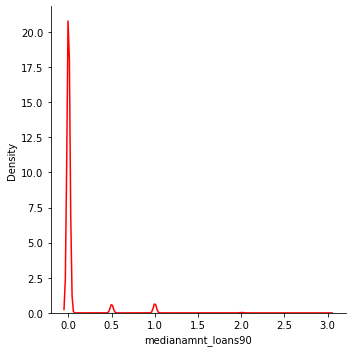

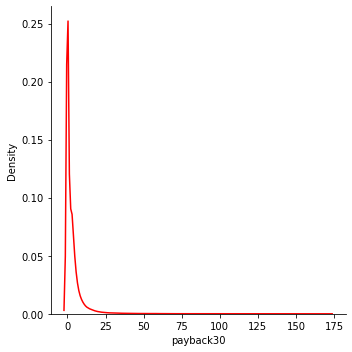

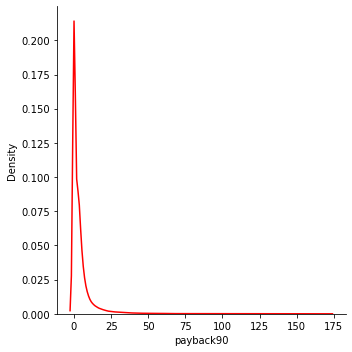

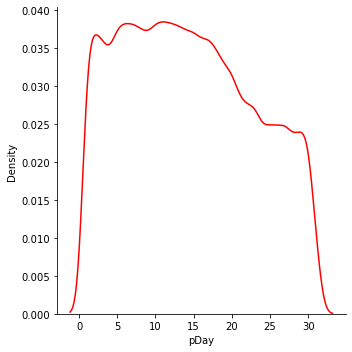

In [63]:
for col in df.columns:
    sns.displot(df[col],color='r',kind='kde')
    plt.show()


almost all are right skewed


In [64]:
for column in df.columns[1:]:
    print(column , df[column].skew())

aon 10.392951132573769
daily_decr90 4.25257843974741
rental90 4.467282406591772
last_rech_date_ma 14.790974409347747
last_rech_date_da 14.814857235209665
last_rech_amt_ma 3.781148637111509
fr_ma_rech30 14.772832636742873
medianmarechprebal30 14.77988292361553
cnt_ma_rech90 3.4252536465582106
fr_ma_rech90 2.285422796522632
medianamnt_ma_rech90 3.752706023594023
medianmarechprebal90 45.086297746602085
cnt_da_rech30 17.818364135256427
fr_da_rech30 14.776430234353553
cnt_da_rech90 27.267277681861458
fr_da_rech90 28.98808270697841
cnt_loans90 16.594407973866012
amnt_loans90 3.150006331942554
maxamnt_loans90 1.6783037897368753
medianamnt_loans90 4.895720276504792
payback30 8.310694656446502
payback90 6.899950812627082
pDay 0.19984532530201307


almost all have skewness

In [65]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=100
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print("box",box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print("logskew",log_col_Skew)
    print("sqrtSkew",sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        

In [66]:
df.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'fr_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pDay'],
      dtype='object')

In [67]:
moreSkew=df.columns[1:]
moreSkew

Index(['aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'fr_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pDay'],
      dtype='object')

In [68]:
len(moreSkew)

23

In [69]:
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

aon
initial 10.392951132573769
box 0.33995105321710856
logskew 2.023267260783524
sqrtSkew 9.81470912526436
0.33995105321710856
aon = box
daily_decr90
initial 4.25257843974741
hi
logskew nan
sqrtSkew 1.234453598403492
1.234453598403492
daily_decr90 = sqrt
rental90
initial 4.467282406591772
hi
logskew nan
sqrtSkew 1.3589780468062003
1.3589780468062003
rental90 = sqrt
last_rech_date_ma
initial 14.790974409347747
hi
logskew nan
sqrtSkew 14.231250646699706
14.231250646699706
last_rech_date_ma = sqrt
last_rech_date_da
initial 14.814857235209665
hi
logskew nan
sqrtSkew 14.242011576135964
14.242011576135964
last_rech_date_da = sqrt
last_rech_amt_ma
initial 3.781148637111509
hi
logskew nan
sqrtSkew 0.8025769577147344
0.8025769577147344
last_rech_amt_ma = sqrt
fr_ma_rech30
initial 14.772832636742873
hi
logskew nan
sqrtSkew 14.226865532009159
14.226865532009159
fr_ma_rech30 = sqrt
medianmarechprebal30
initial 14.77988292361553
hi
logskew nan
sqrtSkew 13.987900872059623
13.987900872059623
medianma

In [70]:
boxTrans=['aon',]
sqrtTrans=['daily_decr90','rental90','last_rech_amt_ma','cnt_ma_rech90',
           'fr_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90','cnt_da_rech30',
           'cnt_da_rech90',
           'fr_da_rech90',
           'cnt_loans90',
           'maxamnt_loans90',
         
           'amnt_loans90',
           'payback30','payback90']

for ('last_rech_date_ma', 'last_rech_date_da','fr_ma_rech30','medianmarechprebal30','fr_da_rech30','medianamnt_loans90')there is no change in skew
 
for pDay there is less skew already


In [71]:
len(sqrtTrans)

15

In [72]:
for column in sqrtTrans:
    df[column] =np.sqrt(df[column])

In [73]:
df['aon']=stats.boxcox(df['aon'])[0]

In [74]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay
1,0,3.867281,55.363797,16.128546,2.0,0.0,39.230090,21.0,7.50,1.414214,4.582576,39.230090,2.738613,0.0,0.0,0.0,0.0,1.414214,3.464102,2.449490,0.0,5.385165,5.385165,20
2,1,4.273533,110.112443,60.755740,20.0,0.0,76.072334,0.0,61.04,1.000000,0.000000,76.072334,7.812810,0.0,0.0,0.0,0.0,1.000000,3.464102,3.464102,0.0,0.000000,0.000000,10
3,1,4.158602,37.389838,30.002167,3.0,0.0,39.230090,0.0,66.32,1.000000,0.000000,39.230090,8.143709,0.0,0.0,0.0,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000,19
4,1,3.812159,4.607385,12.626163,41.0,0.0,30.773365,0.0,0.00,1.000000,0.000000,30.773365,1.581139,0.0,0.0,0.0,0.0,1.414214,3.464102,2.449490,0.0,0.000000,0.000000,6
5,1,4.383677,12.272707,33.149661,4.0,0.0,48.052055,2.0,29.00,2.828427,1.414214,53.740115,5.916080,0.0,0.0,0.0,0.0,2.645751,6.480741,2.449490,0.0,1.527525,1.527525,22


In [75]:
df.isnull().sum()>0

label                   False
aon                     False
daily_decr90            False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma        False
fr_ma_rech30            False
medianmarechprebal30    False
cnt_ma_rech90           False
fr_ma_rech90            False
medianamnt_ma_rech90    False
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
pDay                    False
dtype: bool

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental90              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  float64
 7   fr_ma_rech30          209593 non-null  float64
 8   medianmarechprebal30  209593 non-null  float64
 9   cnt_ma_rech90         209593 non-null  float64
 10  fr_ma_rech90          209593 non-null  float64
 11  medianamnt_ma_rech90  209593 non-null  float64
 12  medianmarechprebal90  209593 non-null  float64
 13  cnt_da_rech30         209593 non-null  float64
 14  fr_da_rech30          209593 non-null  float64
 15  

In [77]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.000000,1.000000
aon,209593.0,4.094238,0.446655,0.0,3.821580,4.152413,4.397375,6.057974
daily_decr90,209593.0,54.414564,55.871408,0.0,6.534014,38.729833,88.333403,566.241998
rental90,209593.0,46.159175,37.132658,0.0,18.165902,36.704496,64.842193,447.379157
last_rech_date_ma,209593.0,3756.125844,53905.872857,0.0,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209593.0,3712.204801,53374.833299,0.0,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209593.0,39.470845,22.505724,0.0,27.748874,39.230090,48.052055,234.520788
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.0,0.000000,2.000000,6.000000,999606.368132
medianmarechprebal30,209593.0,3854.219020,54006.210975,0.0,11.670000,35.000000,85.300000,999479.419319
cnt_ma_rech90,209593.0,2.151014,1.299452,0.0,1.414214,2.000000,2.828427,18.330303


In [78]:
#Splitting the data into x and y
X = df.drop(['label'], axis=1)

y = df['label']

## identifying the best random state

In [79]:
max_accu=0
maxRS=0
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.8771795390798948 on random state 23


best accuracy is 0.8771795390798948 on random state 23


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [81]:
y_train.value_counts()

1    122826
0     17601
Name: label, dtype: int64

In [82]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [83]:
y_resample.value_counts()

0    122826
1    122826
Name: label, dtype: int64

In [84]:
X_resample.head()

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay
0,4.146909,47.539457,14.146731,23.0,0.0,39.230090,0.0,18.90,1.000000,0.000000,39.230090,4.347413,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,7
1,4.253600,73.236398,58.997797,5.0,0.0,27.748874,3.0,47.17,3.464102,1.732051,27.748874,5.759340,0.0,0.0,0.0,0.0,1.732051,4.242641,2.44949,0.0,0.000000,2.549510,26
2,3.796612,8.922817,44.430170,1.0,0.0,48.052055,0.0,90.00,3.000000,0.000000,27.802878,9.486833,0.0,0.0,0.0,0.0,2.645751,6.480741,2.44949,0.0,1.581139,1.581139,17
3,4.290275,1.655295,9.214120,2.0,0.0,27.802878,1.0,6.30,2.000000,1.000000,27.802878,2.509980,0.0,0.0,0.0,0.0,1.414214,3.464102,2.44949,0.0,1.414214,1.414214,1
4,4.374767,60.158125,75.802441,18.0,0.0,48.052055,2.0,38.20,1.732051,5.291503,39.230090,8.012490,0.0,0.0,0.0,0.0,1.732051,4.242641,2.44949,0.0,0.000000,3.741657,28


In [85]:
scaler = StandardScaler()

In [86]:
scaled_X_train = scaler.fit_transform(X_resample)
scaled_X_test = scaler.transform(X_test)

In [87]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_resample)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51      8561
           1       0.94      0.91      0.92     60605

    accuracy                           0.87     69166
   macro avg       0.70      0.74      0.72     69166
weighted avg       0.88      0.87      0.87     69166



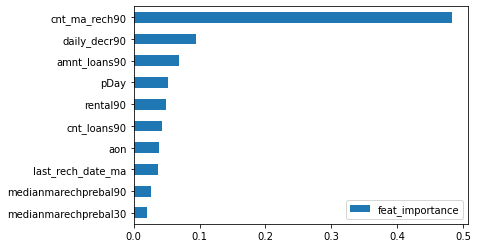

In [88]:
dt_features = pd.DataFrame(DTC.feature_importances_, index=X.columns, columns=['feat_importance'])
dt_features.sort_values('feat_importance').tail(10).plot.barh()
plt.show()

In [89]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_resample)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      8561
           1       0.94      0.96      0.95     60605

    accuracy                           0.91     69166
   macro avg       0.80      0.76      0.78     69166
weighted avg       0.91      0.91      0.91     69166



In [90]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_resample)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.38      0.69      0.49      8561
           1       0.95      0.84      0.89     60605

    accuracy                           0.82     69166
   macro avg       0.67      0.77      0.69     69166
weighted avg       0.88      0.82      0.84     69166



In [91]:
dtcAC=0.87
rfcAC=0.91
adaAC=0.82

### now checking cross val score

In [93]:
from imblearn.pipeline import Pipeline, make_pipeline

In [94]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,DTC)
DTCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
DTCcv

0.8623697268179752

In [95]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,RFC)
RFCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
RFCcv

0.9096256117445728

In [96]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,ada)
adaCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
adaCV

0.8222350373761731

In [97]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(adaAC-adaCV)

0.007630273182024805
0.0003743882554272382
-0.0022350373761731435


Based on accuracy score difference and f1score choosing RFC as best method for hyperParameter tuning

## HyperParameterTuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),
                   ('scaler',StandardScaler()),
                   ('rfc',RandomForestClassifier())])

In [105]:
param_grid = {'rfc__min_samples_split':[2,3],'rfc__min_impurity_decrease':[0,0.01],
             'rfc__min_samples_leaf':[1,3]}
grid = GridSearchCV(pipeLine,param_grid,verbose=2)

In [106]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=  38.3s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=  39.2s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=  40.5s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=  38.5s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=  39.1s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=  38.4s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=  39.0s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=  39.1s
[CV] END rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc_

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__min_impurity_decrease': [0, 0.01],
                         'rfc__min_samples_leaf': [1, 3],
                         'rfc__min_samples_split': [2, 3]},
             verbose=2)

In [107]:
grid.best_params_

{'rfc__min_impurity_decrease': 0,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 3}

In [109]:
grid.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(min_impurity_decrease=0,
                                        min_samples_split=3))])

In [110]:
grid.best_score_

0.9096897092352133

In [111]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__min_impurity_decrease,param_rfc__min_samples_leaf,param_rfc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.579809,0.762081,0.656114,0.017128,0,1,2,"{'rfc__min_impurity_decrease': 0, 'rfc__min_sa...",0.910560,0.911486,0.910735,0.906213,0.907816,0.909362,0.002007,2
1,39.024074,0.929933,0.653584,0.034329,0,1,3,"{'rfc__min_impurity_decrease': 0, 'rfc__min_sa...",0.911023,0.911557,0.911091,0.907032,0.907744,0.909690,0.001901,1
2,36.729502,0.284967,0.609289,0.072708,0,3,2,"{'rfc__min_impurity_decrease': 0, 'rfc__min_sa...",0.906608,0.907107,0.905644,0.903650,0.903507,0.905303,0.001485,3
3,38.302586,1.126774,0.585592,0.042748,0,3,3,"{'rfc__min_impurity_decrease': 0, 'rfc__min_sa...",0.907214,0.907356,0.905822,0.903614,0.902510,0.905303,0.001938,4
4,13.047155,1.046836,0.132167,0.008158,0.01,1,2,"{'rfc__min_impurity_decrease': 0.01, 'rfc__min...",0.785480,0.785089,0.791312,0.780132,0.779918,0.784386,0.004189,5
5,13.560987,0.667832,0.134189,0.007722,0.01,1,3,"{'rfc__min_impurity_decrease': 0.01, 'rfc__min...",0.784056,0.784839,0.785117,0.778387,0.780773,0.782634,0.002629,6
6,12.614659,0.580863,0.132715,0.012412,0.01,3,2,"{'rfc__min_impurity_decrease': 0.01, 'rfc__min...",0.776864,0.786014,0.776820,0.781022,0.779598,0.780064,0.003385,8
7,12.144415,0.167815,0.132048,0.004271,0.01,3,3,"{'rfc__min_impurity_decrease': 0.01, 'rfc__min...",0.783593,0.783130,0.781449,0.780203,0.774186,0.780512,0.003387,7


## Training with best params

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

In [113]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),
                   ('scaler',StandardScaler()),
                   ('rfc',RandomForestClassifier(min_impurity_decrease=0,min_samples_leaf=1,min_samples_split=3))])

In [114]:
Final_model=pipeLine
Final_model.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(min_impurity_decrease=0,
                                        min_samples_split=3))])

In [117]:
pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.9113726397362866


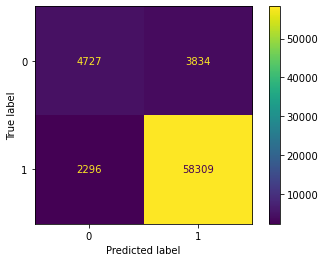

In [119]:
plot_confusion_matrix(Final_model,X_test,y_test)

In [121]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.61      8561
           1       0.94      0.96      0.95     60605

    accuracy                           0.91     69166
   macro avg       0.81      0.76      0.78     69166
weighted avg       0.91      0.91      0.91     69166



final accuracy achieved is 91% with RandomForestClassifier
and f1 score is also good

## plotting AUC ROC CURVE

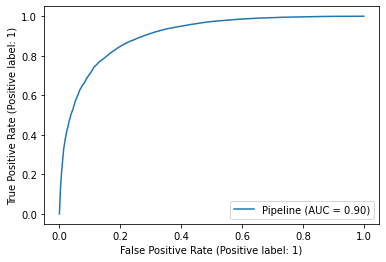

In [122]:
plot_roc_curve(Final_model,X_test,y_test)

AUC-ROC Curve area is 0.90 which is good.

## saving the model

In [123]:
import joblib
joblib.dump(Final_model,"MicroCreditLoanClassifier.pkl")

['MicroCreditLoanClassifier.pkl']